<a href="https://colab.research.google.com/github/BaranidharanB/Augmented-Reality-based-Human-Face-3D-Model-draping/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For using Nvidia driver I have uploaded it to my Google drive and used it via colab
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/baranidh_gokulvis_final_project/Code/

/content/gdrive/MyDrive/baranidh_gokulvis_final_project/Code


In [ ]:
#Requred Pip files
!pip install torch torchvision numpy scipy chumpy scikit-image opencv-python PyYAML face-alignment yacs mediapipe kornia ninja fvcore lucid>=0.2.3 gdown matplotlib

In [ ]:
#Downloading predefined 3D face image model
print("Downloading pre-build model")
!gdown --id 1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje -O data/deca_model.tar

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje
To: /content/gdrive/MyDrive/baranidh_gokulvis_final_project/Code/data/deca_model.tar
100% 434M/434M [00:03<00:00, 126MB/s] 


In [ ]:
#Checking whether the system has NVIDIA driver. Without NVIDia driver we cannot run this application
print("Checking for NVIDIA driver")
!nvidia-smi

Checking for NVIDIA driver
Tue May  9 22:07:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                             

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:00<00:00, 202MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100% 91.9M/91.9M [00:00<00:00, 152MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
creating the FLAME Decoder
trained model found. load /content/gdrive/MyDrive/baranidh_gokulvis_final_project/Code/data/deca

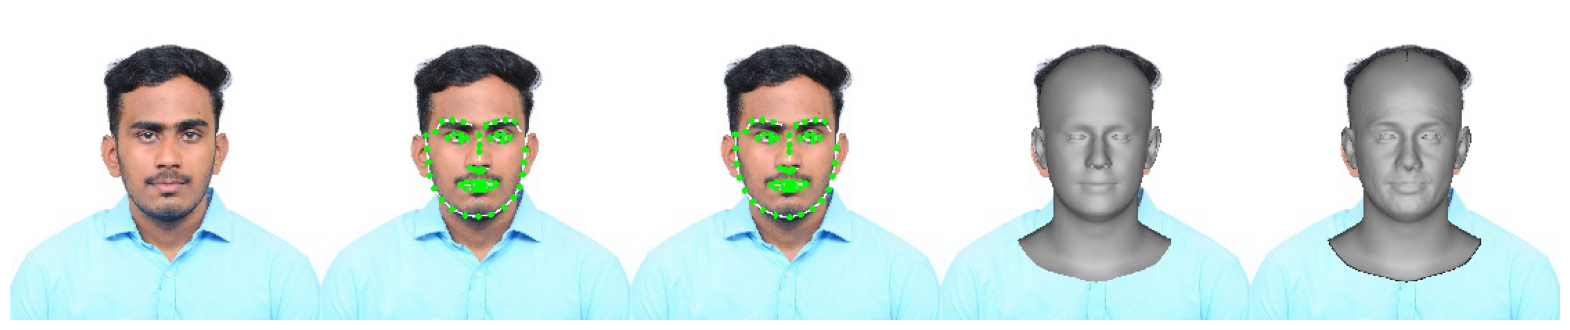

In [ ]:
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Definining the input file folder and output to be placed and training the DECA model
input_folder = os.getcwd()+"/testData"
output_folder = os.path.join(input_folder, "results")
!python demos/demo_reconstruct.py -i $input_folder -s $output_folder --saveDepth True --saveObj True

# Plotting all the output created by DECA model
vispath_list = glob(output_folder+'/*_size.jpg')
for vispath in vispath_list:
  image = Image.open(vispath)
  plt.figure(figsize=(20, 20))
  plt.imshow(image)
  plt.axis("off");
  break
print(f'Please check all results in {output_folder}')

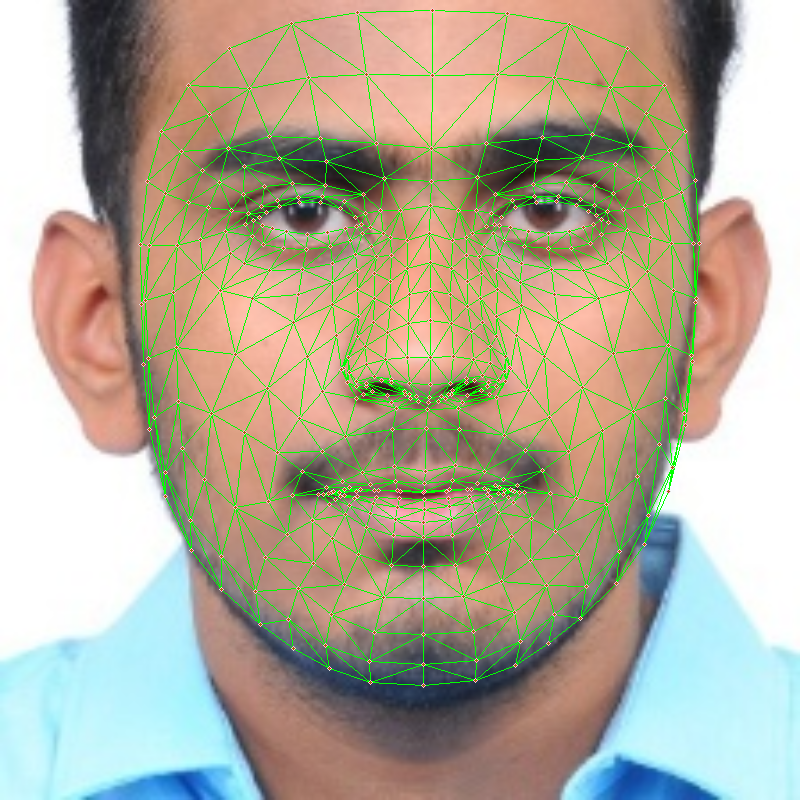

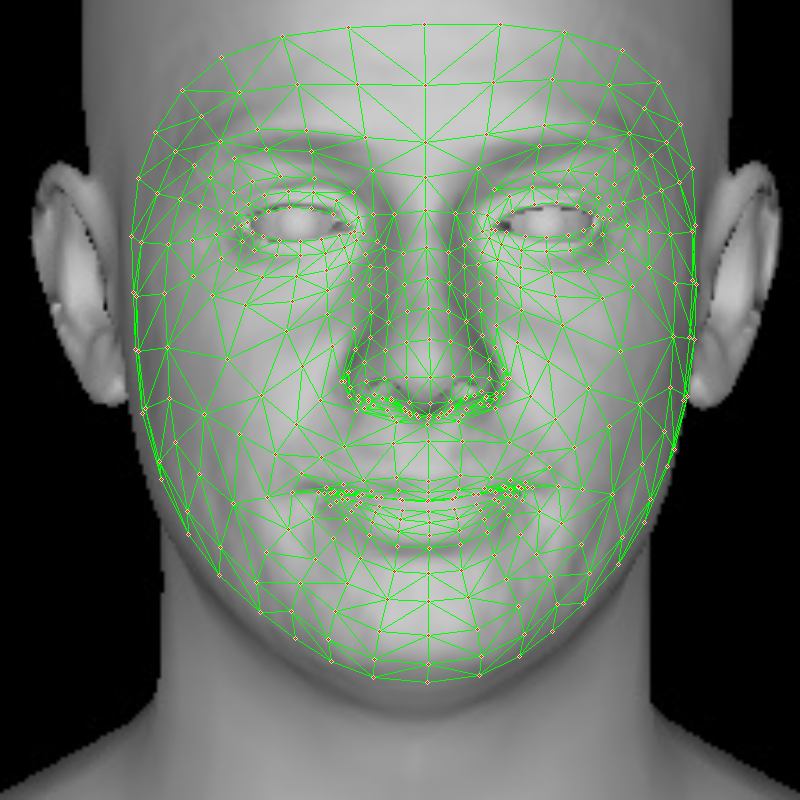

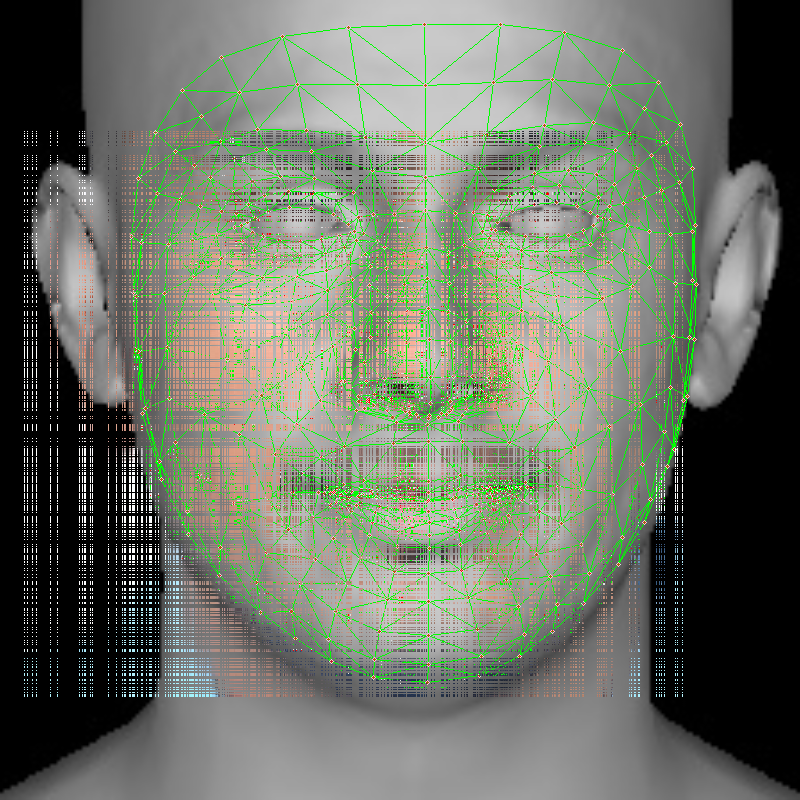

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import os
import numpy as np

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

#checking whether 3 points form a triangle
def checkTriangle(x1, y1, x2, y2, x3, y3):

    area = (x1 * (y2 - y3) +
         x2 * (y3 - y1) +
         x3 * (y1 - y2))
    if area == 0:
        return 0
    else:
        return 1

#code for finding the landmark in given face image and form a mesh
def mesh_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    # print(img.shape)

    with mp_face_mesh.FaceMesh(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as face_mesh:

        # Converting the BGR image to RGB.
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = face_mesh.process(image)

        # Drawing the face mesh annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1))

        # cv2.imwrite("outputs/finalface_mesh1.jpeg", image)
        cv2_imshow(image)

    return image, results.multi_face_landmarks[0]

#User input image
meshed_image, landmarks = mesh_image(os.getcwd()+"/testData/results/test_vis_original.jpg")
##D structure image
mesh3d_image, landmarks_3d = mesh_image(os.getcwd()+"/testData/results/test_vis_shape.jpg")

#mesh points to arrays
keypoints = []
for data_point in landmarks.landmark:
    keypoints.append({
                         'X': data_point.x,
                         'Y': data_point.y,
                         'Z': data_point.z,
                         })

keypoints3d = []
for data_point in landmarks_3d.landmark:
    keypoints3d.append({
                         'X': data_point.x,
                         'Y': data_point.y,
                         'Z': data_point.z,
                         })
#plotting the pixel values onto the 3d structure
for x in range(len(keypoints)):
  y = x+1
  z = x+2
  nearby_pixel = range(-800,800)
  for value in nearby_pixel:
    for value2 in nearby_pixel:
      i1 = x + value
      j1 = y + value
      k1 = z + value
      i2 = x + value2
      j2 = y + value2
      k2 = z + value2
      if(0<=i1<468 and 0<=i2<468 and 0<=j1<468 and 0<=j2<468 and 0<=k1<468 and 0<=k2<468):
        output = checkTriangle(keypoints[i1]["X"], keypoints[i2]["Y"],
                              keypoints[j1]["X"], keypoints[j2]["Y"],
                              keypoints[k1]["X"], keypoints[k2]["Y"])
        if output == 1:
          mesh3d_image[int(keypoints3d[i1]["X"]*mesh3d_image.shape[1]), int(keypoints3d[i2]["Y"]*mesh3d_image.shape[0])] = meshed_image[int(keypoints[i1]["X"]*meshed_image.shape[1]), int(keypoints[i2]["Y"]*meshed_image.shape[0])]
          mesh3d_image[int(keypoints3d[j1]["X"]*mesh3d_image.shape[1]), int(keypoints3d[j2]["Y"]*mesh3d_image.shape[0])] = meshed_image[int(keypoints[j1]["X"]*meshed_image.shape[1]), int(keypoints[j2]["Y"]*meshed_image.shape[0])]
          mesh3d_image[int(keypoints3d[k1]["X"]*mesh3d_image.shape[1]), int(keypoints3d[k2]["Y"]*mesh3d_image.shape[0])] = meshed_image[int(keypoints[k1]["X"]*meshed_image.shape[1]), int(keypoints[k2]["Y"]*meshed_image.shape[0])]


# print(meshed_image[int(keypoints[0]["X"]*meshed_image.shape[1]), int(keypoints[0]["Y"]*meshed_image.shape[0]), 1])

# cv2_imshow(meshed_image)
cv2_imshow(mesh3d_image)


In [ ]:
#Face mesh process
import dlib

# Loading the face detector and shape predictor models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(os.getcwd()+'/data/shape_predictor_68_face_landmarks.dat')

image1 = os.getcwd()+"/testData/test_vis_original.jpg"
image2 = os.getcwd()+"/testData/results/test_vis_shape.jpg"

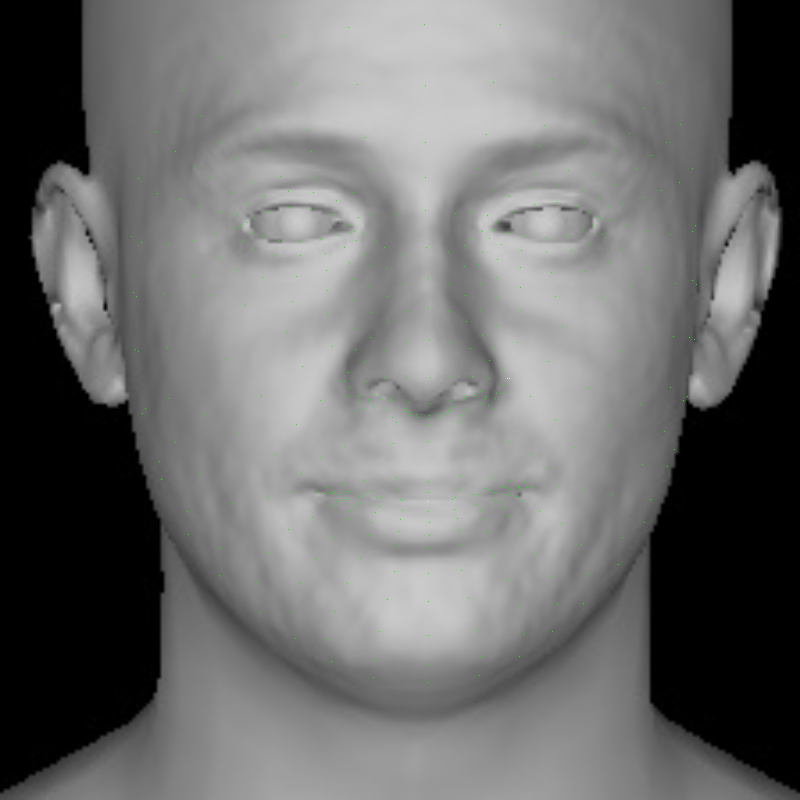

In [ ]:
# Program of Overlapping the actual pixels to 3D model - 1

#Ref: Output will be tiny dots on the 3D model

import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow

def extract_pixel_values(image, face_landmarks):
    pixel_values = []
    for i, landmark in enumerate(face_landmarks.landmark):
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        if x >= 0 and x < image.shape[1] and y >= 0 and y < image.shape[0]:
            pixel_value = image[y, x]
            # print(f"Plot {i+1}: Pixel value at ({x}, {y}): {pixel_value}")
            pixel_values.append((i+1, pixel_value))
    return pixel_values

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Load images
img1 = meshed_image
img2 = cv2.imread(os.getcwd()+"/testData/results/test_vis_shape.jpg")


# Processing first image
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:

    # Converting the BGR image to RGB.
    image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    image1.flags.writeable = False
    results = face_mesh.process(image1)

    # Drawing the face mesh annotations on the image.
    image1.flags.writeable = True
    image_drawn = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
        for face_landmarks1 in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image_drawn,
                landmark_list=face_landmarks1,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1))

        pixel_values1 = extract_pixel_values(image1, landmarks)

    # Procesings second image
    with mp_face_mesh.FaceMesh(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as face_mesh:

        # Converting the BGR image to RGB.
        image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        width = 800
        height = 800
        image2 = cv2.resize(image2, (width, height))
        image2.flags.writeable = False
        results = face_mesh.process(image2)

        # Drawing the face mesh annotations on the image.
        image2.flags.writeable = True
        image_drawn = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks2 in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image_drawn,
                    landmark_list=face_landmarks2,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1))
            pixel_values2 = extract_pixel_values(image2, landmarks_3d)

if landmarks and landmarks_3d:
    # Extracting pixel values for image1
    pixel_values = extract_pixel_values(image1, landmarks)

    # Creating a copy of image2 for merging
    merged_image = image2.copy()

    # Replacing the pixels in merged_image with pixels from image1
    for (i, pixel) in pixel_values:
        landmark = landmarks_3d.landmark[i-1]
        x = int(landmark.x * image2.shape[1])
        y = int(landmark.y * image2.shape[0])
        merged_image[y, x] = pixel

    # Displaying the merged image
    # cv2.imshow('outputs/Merged Image', merged_image)
    cv2_imshow(merged_image)
    cv2.waitKey(0)


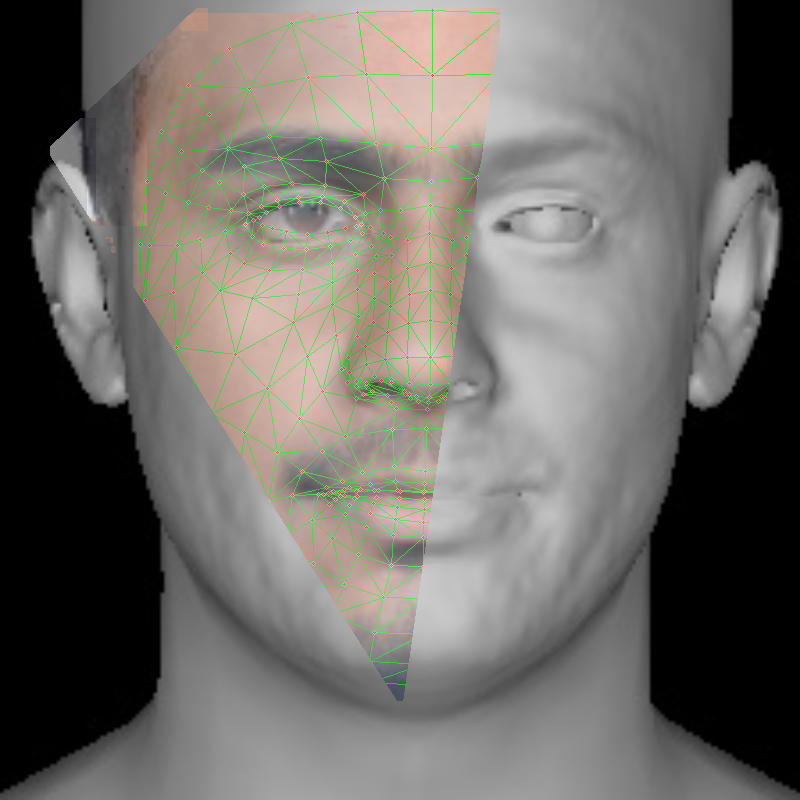

In [ ]:
# Program of Half Draped in the 3D model

import numpy as np

# Load the images
# img1 = cv2.imread("image.jpeg")
# img2 = cv2.imread("facemeshmodel.jpeg")

# Resizing the second image to match the size of the first image
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Creating a mask with the region of interest
mask = np.zeros_like(img1)
# roi = np.array([[200, 8], [500, 10], [440, 700], [50, 150]])
roi = np.array([[200, 8], [500, 8], [400, 700], [50, 150]])
cv2.fillPoly(mask, [roi], (255, 255, 255))

# Converting the mask to grayscale and apply a blur
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask_gray_blur = cv2.GaussianBlur(mask_gray, (5, 5), 0)

# Applying the mask to both images
img1_masked = cv2.bitwise_and(img1, mask)
img2_resized_masked = cv2.bitwise_and(img2_resized, mask)

# Computing the difference between the masked images
diff = cv2.absdiff(img1_masked, img2_resized_masked)

# Converting the difference image to grayscale and apply a threshold
diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(diff_gray, 30, 255, cv2.THRESH_BINARY)

# Finding the contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Merging the images by averaging the pixel values in the overlapping region
for contour in contours:
    # Getting the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Getting the pixel values in the overlapping region
    pixel_values1 = img1[y:y+h, x:x+w][mask_gray_blur[y:y+h, x:x+w] != 0]
    pixel_values2 = img2_resized[y:y+h, x:x+w][mask_gray_blur[y:y+h, x:x+w] != 0]

    # Calculating average the pixel values and set them in the output image
    pixel_value = np.mean([pixel_values1, pixel_values2], axis=0)
    img2_resized[y:y+h, x:x+w][mask_gray_blur[y:y+h, x:x+w] != 0] = pixel_value

# Saving the merged image
# cv2.imwrite("outputs/merged1.jpeg", img2_resized)
cv2_imshow(img2_resized)

In [ ]:
'''@inproceedings{DECA:Siggraph2021,
  title={Learning an Animatable Detailed {3D} Face Model from In-The-Wild Images},
  author={Feng, Yao and Feng, Haiwen and Black, Michael J. and Bolkart, Timo},
  journal = {ACM Transactions on Graphics, (Proc. SIGGRAPH)},
  volume = {40},
  number = {8},
  year = {2021},
  url = {https://doi.org/10.1145/3450626.3459936}
}'''

'@inproceedings{DECA:Siggraph2021,\n  title={Learning an Animatable Detailed {3D} Face Model from In-The-Wild Images},\n  author={Feng, Yao and Feng, Haiwen and Black, Michael J. and Bolkart, Timo},\n  journal = {ACM Transactions on Graphics, (Proc. SIGGRAPH)}, \n  volume = {40}, \n  number = {8}, \n  year = {2021}, \n  url = {https://doi.org/10.1145/3450626.3459936} \n}'